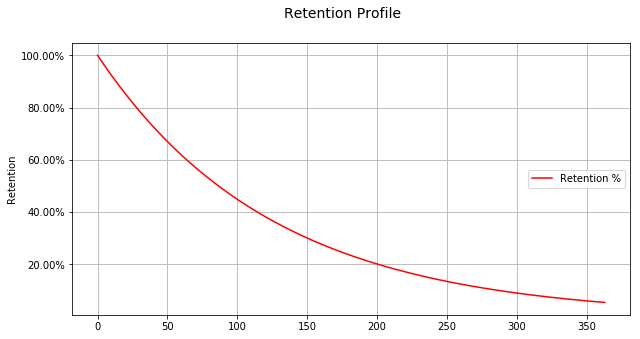

+-----+-------------+
| Day | Retention % |
+-----+-------------+
|  0  |     100     |
+-----+-------------+
|  1  |     99      |
+-----+-------------+
| 30  |     78      |
+-----+-------------+
| 60  |     61      |
+-----+-------------+
| 360 |      5      |
+-----+-------------+


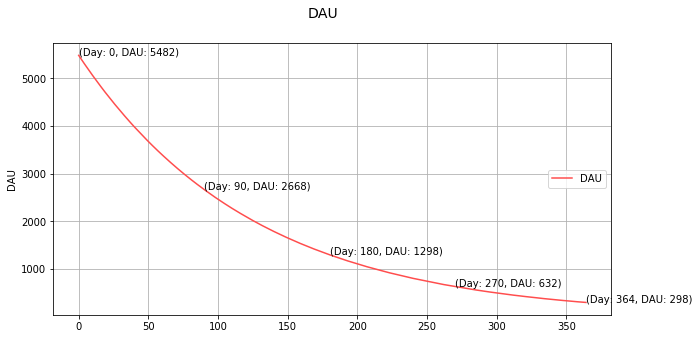

+-----+------+--------------------+
| Day | DAU  | Needed Replacement |
+-----+------+--------------------+
|  0  | 5482 |         0          |
+-----+------+--------------------+
| 90  | 2668 |        2814        |
+-----+------+--------------------+
| 180 | 1298 |        4184        |
+-----+------+--------------------+
| 270 | 632  |        4850        |
+-----+------+--------------------+
| 364 | 298  |        5184        |
+-----+------+--------------------+


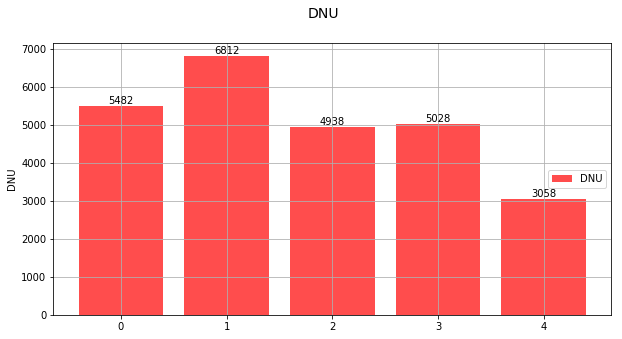

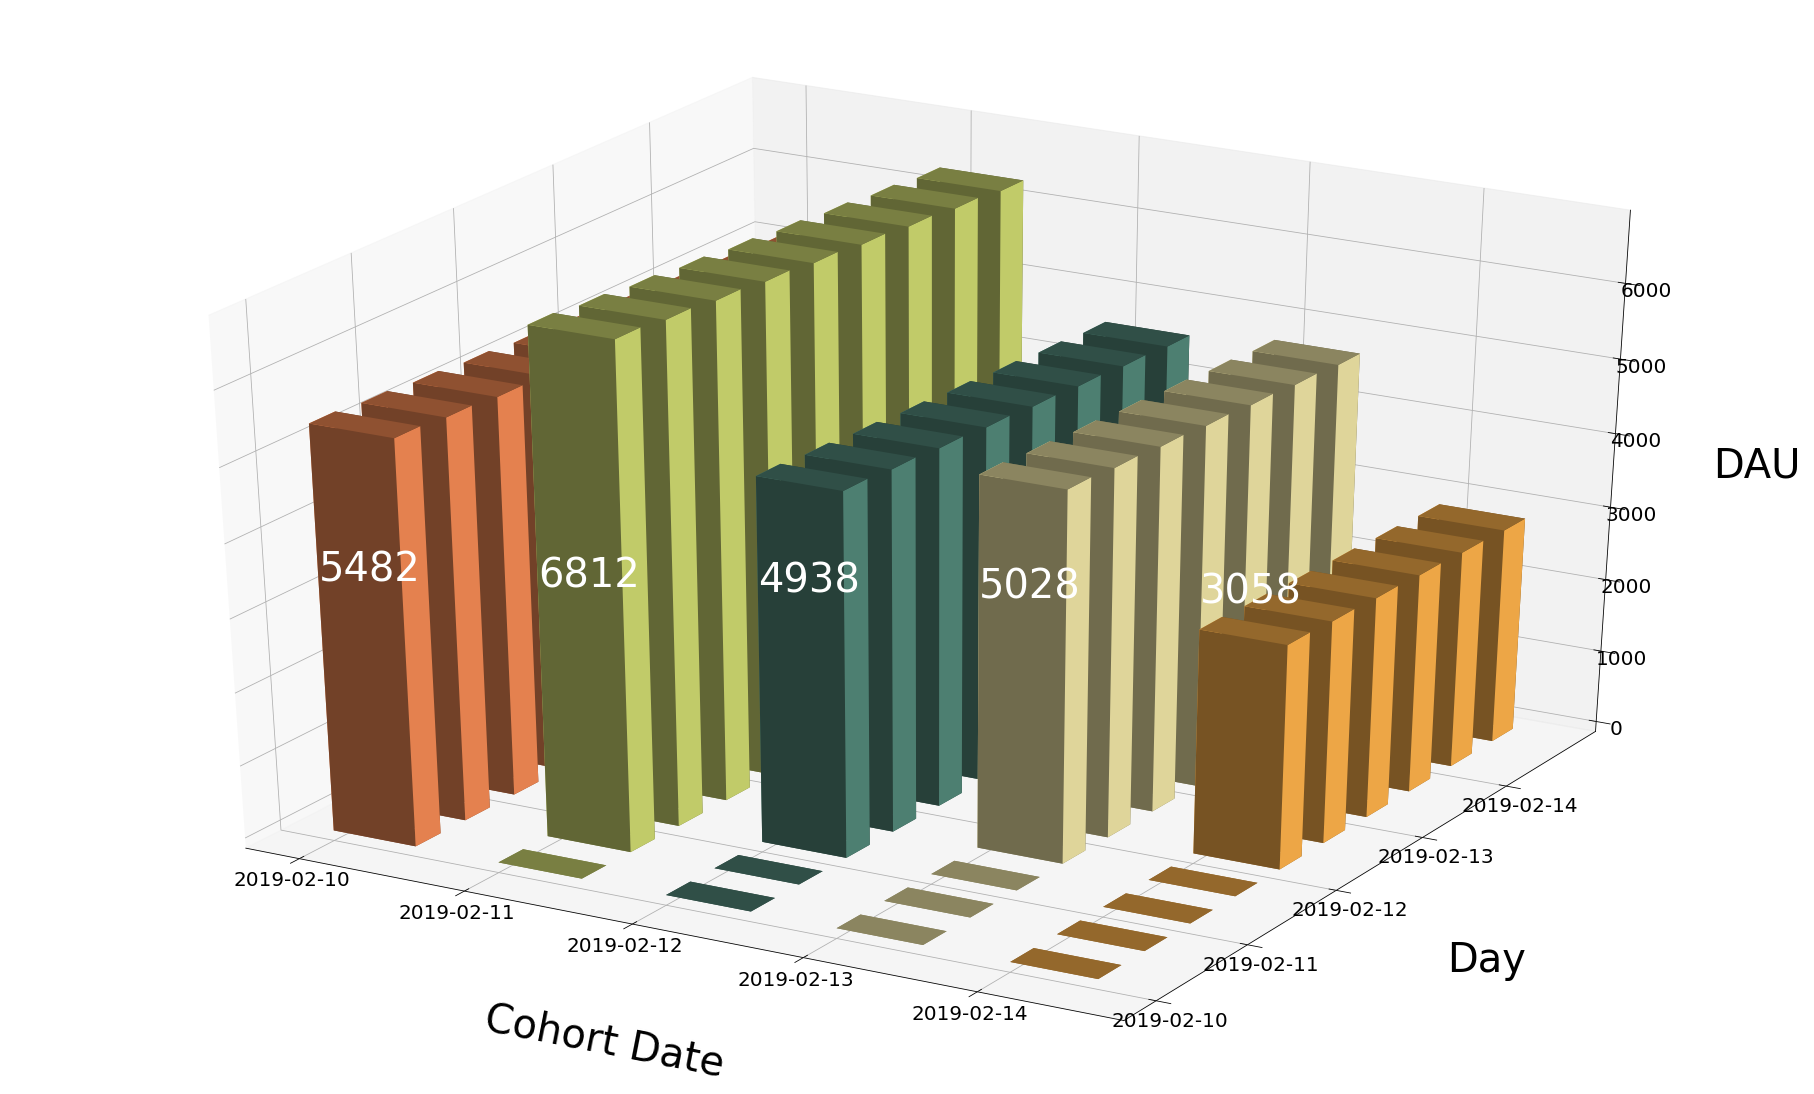

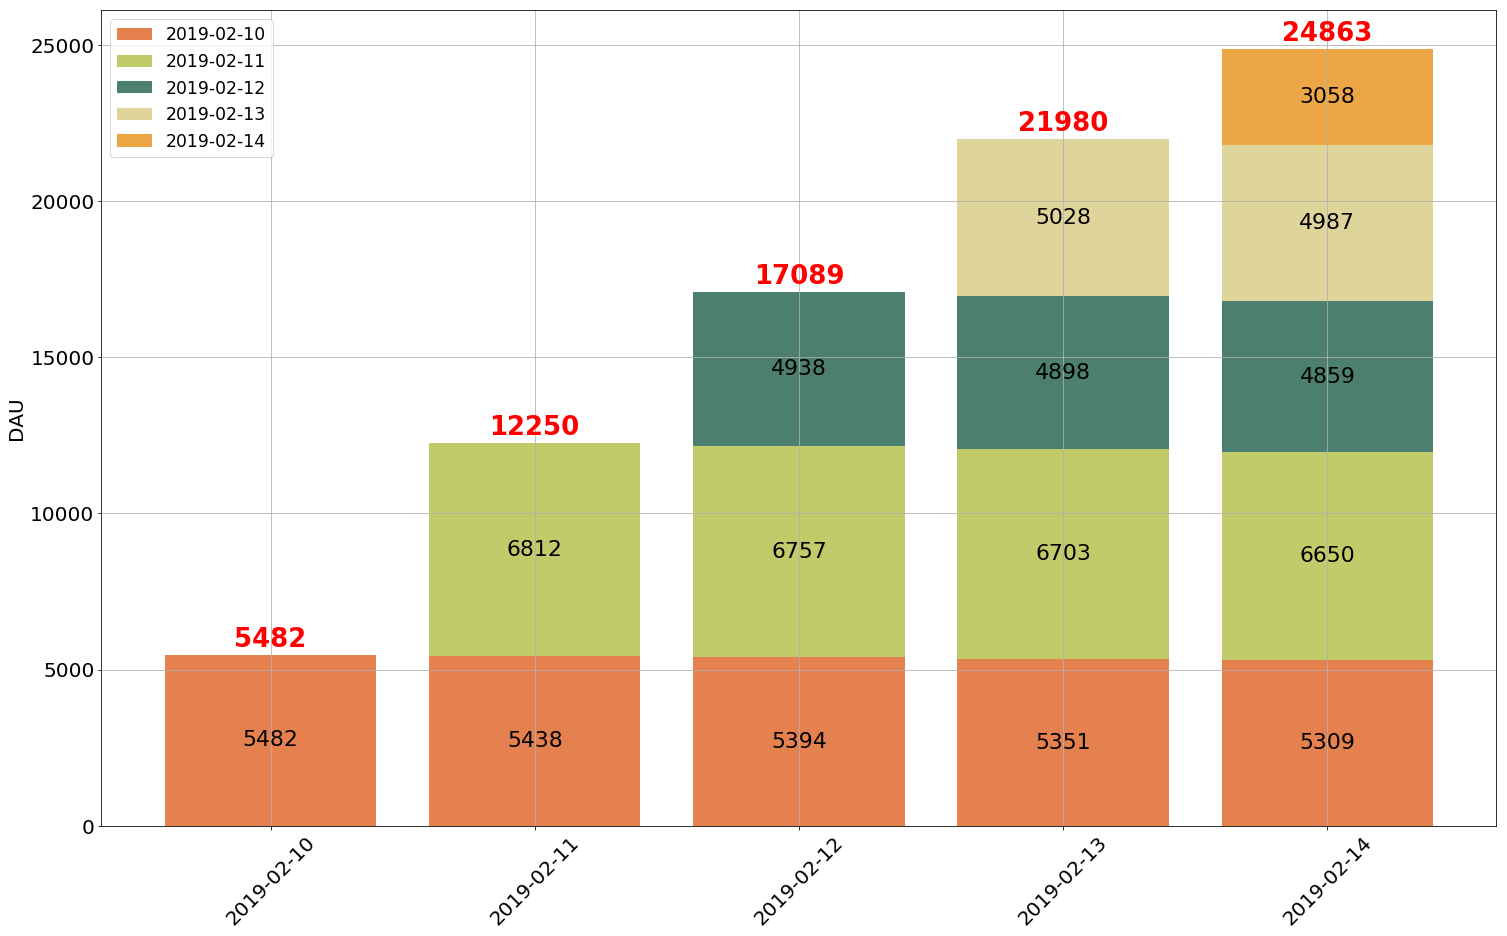

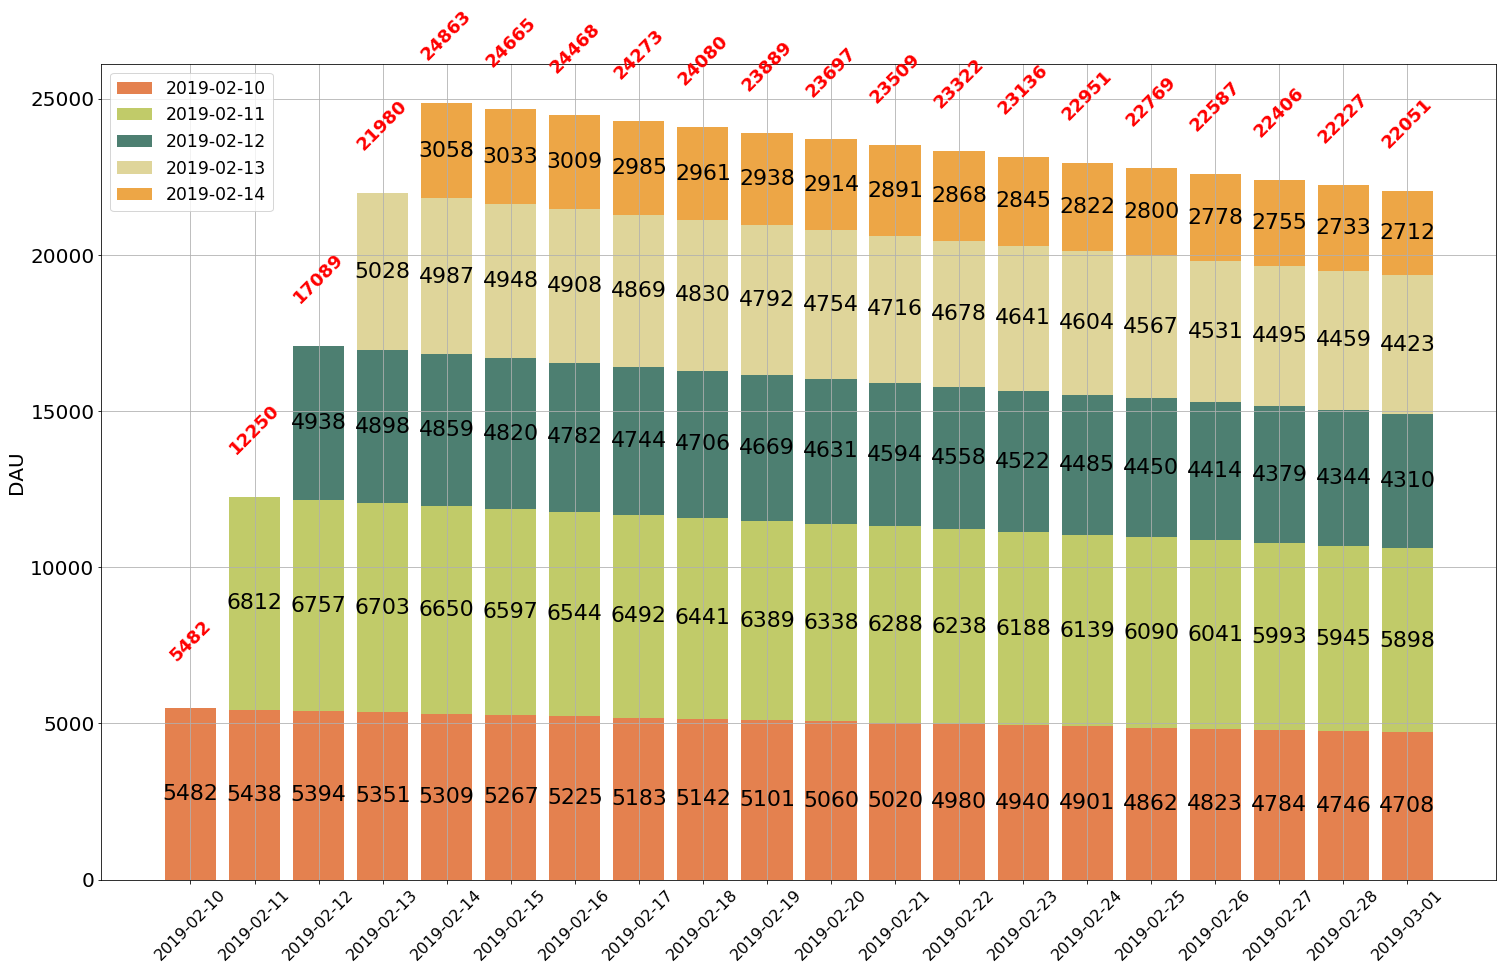

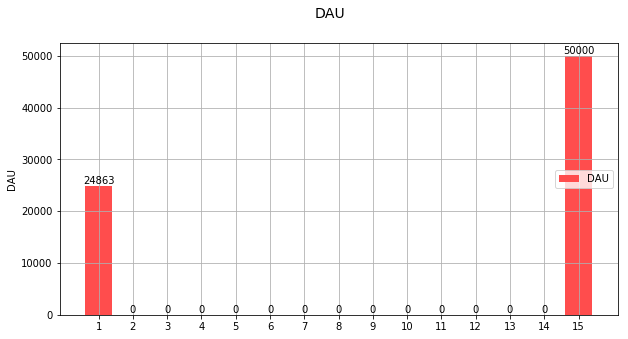

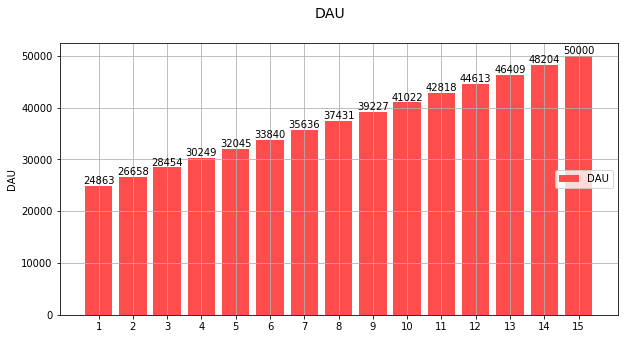

+------------+-------------+
|    date    | cohort_size |
+------------+-------------+
| 2019-02-15 |   1993.5    |
+------------+-------------+
| 2019-02-16 |   2009.0    |
+------------+-------------+
| 2019-02-17 |   2023.5    |
+------------+-------------+
| 2019-02-18 |   2035.0    |
+------------+-------------+
| 2019-02-19 |   2051.5    |
+------------+-------------+
| 2019-02-20 |   2067.0    |
+------------+-------------+
| 2019-02-21 |   2079.5    |
+------------+-------------+
| 2019-02-22 |   2095.0    |
+------------+-------------+
| 2019-02-23 |   2108.5    |
+------------+-------------+
| 2019-02-24 |   2122.0    |
+------------+-------------+
| 2019-02-25 |   2134.5    |
+------------+-------------+
| 2019-02-26 |   2155.0    |
+------------+-------------+
| 2019-02-27 |   2166.5    |
+------------+-------------+
| 2019-02-28 |   2181.0    |
+------------+-------------+


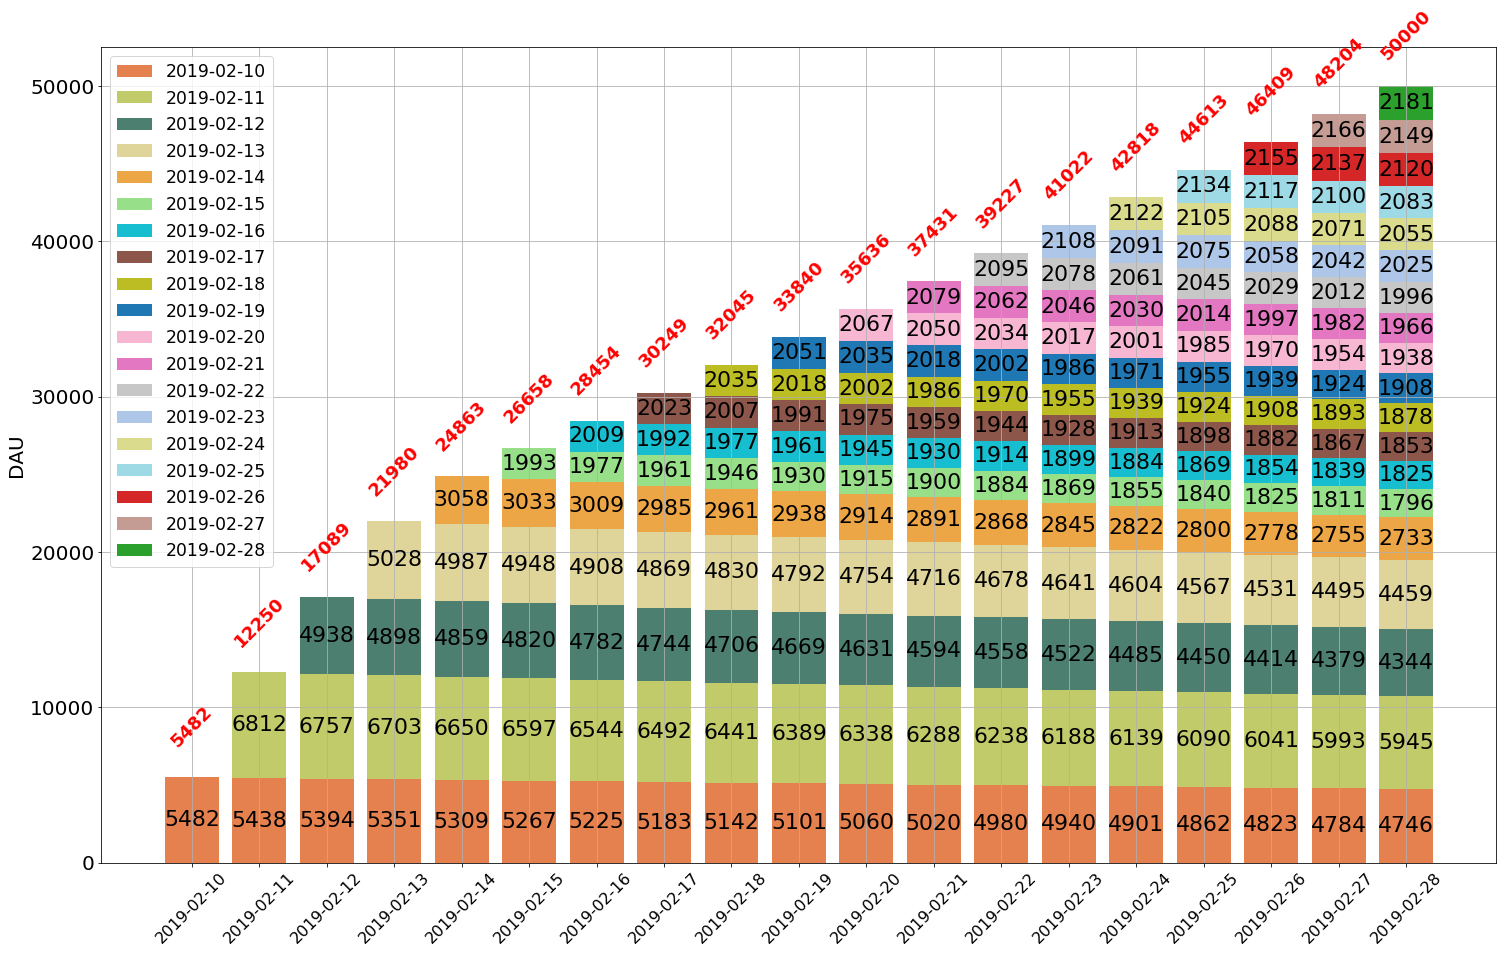

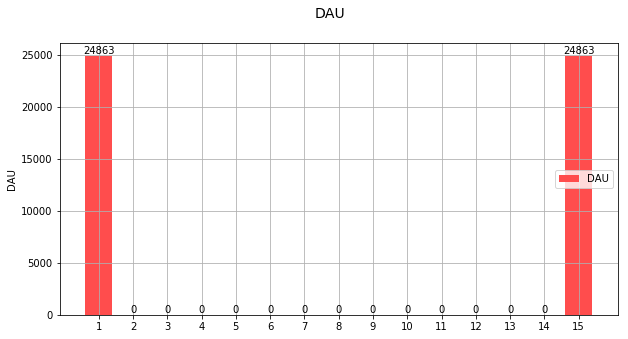

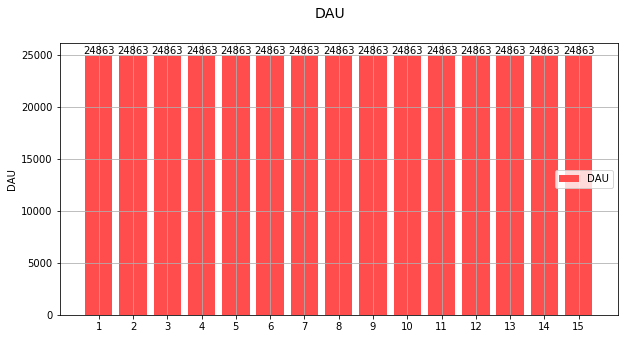

+------------+-------------+
|    date    | cohort_size |
+------------+-------------+
| 2019-02-15 |    198.0    |
+------------+-------------+
| 2019-02-16 |    199.0    |
+------------+-------------+
| 2019-02-17 |    199.0    |
+------------+-------------+
| 2019-02-18 |    198.0    |
+------------+-------------+
| 2019-02-19 |    198.0    |
+------------+-------------+
| 2019-02-20 |    200.0    |
+------------+-------------+
| 2019-02-21 |    198.0    |
+------------+-------------+
| 2019-02-22 |    198.0    |
+------------+-------------+
| 2019-02-23 |    199.0    |
+------------+-------------+
| 2019-02-24 |    199.0    |
+------------+-------------+
| 2019-02-25 |    198.0    |
+------------+-------------+
| 2019-02-26 |    199.0    |
+------------+-------------+
| 2019-02-27 |    200.0    |
+------------+-------------+
| 2019-02-28 |    199.0    |
+------------+-------------+


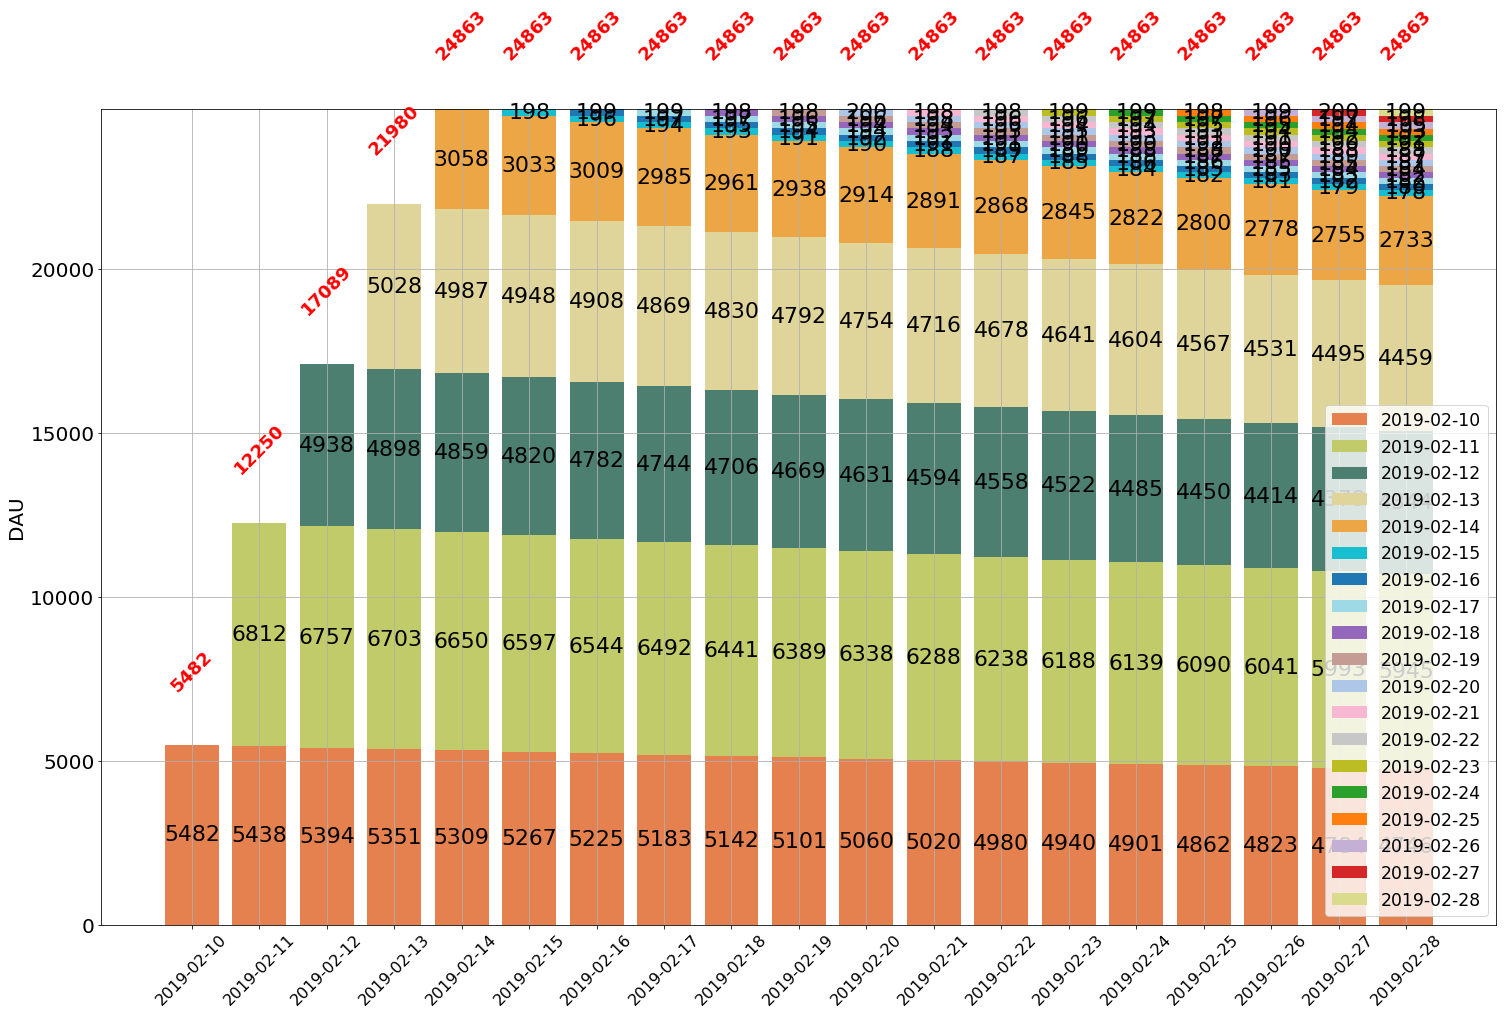

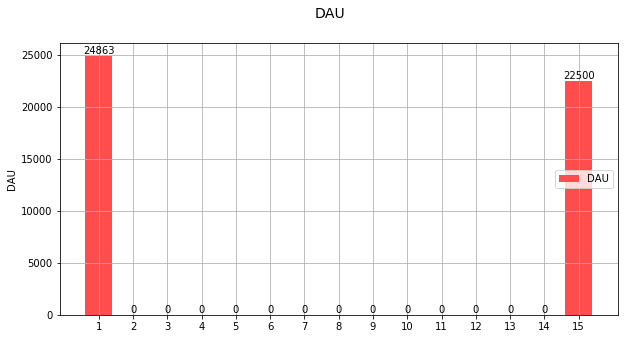

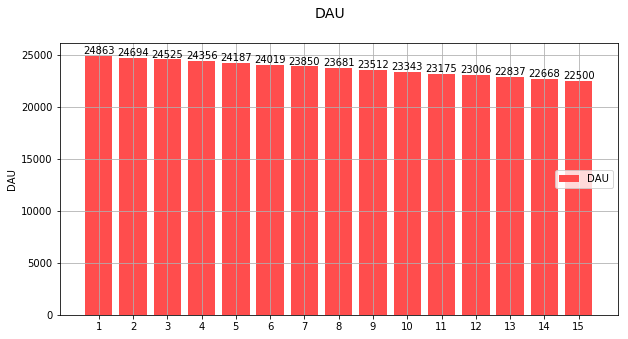

+------------+-------------+
|    date    | cohort_size |
+------------+-------------+
| 2019-02-15 |   29.214    |
+------------+-------------+
| 2019-02-16 |   29.429    |
+------------+-------------+
| 2019-02-17 |   26.643    |
+------------+-------------+
| 2019-02-18 |   25.857    |
+------------+-------------+
| 2019-02-19 |   23.071    |
+------------+-------------+
| 2019-02-20 |   24.286    |
+------------+-------------+
| 2019-02-21 |    21.5     |
+------------+-------------+
| 2019-02-22 |   19.714    |
+------------+-------------+
| 2019-02-23 |   19.929    |
+------------+-------------+
| 2019-02-24 |   18.143    |
+------------+-------------+
| 2019-02-25 |   17.357    |
+------------+-------------+
| 2019-02-26 |   13.571    |
+------------+-------------+
| 2019-02-27 |   15.786    |
+------------+-------------+
| 2019-02-28 |    13.0     |
+------------+-------------+


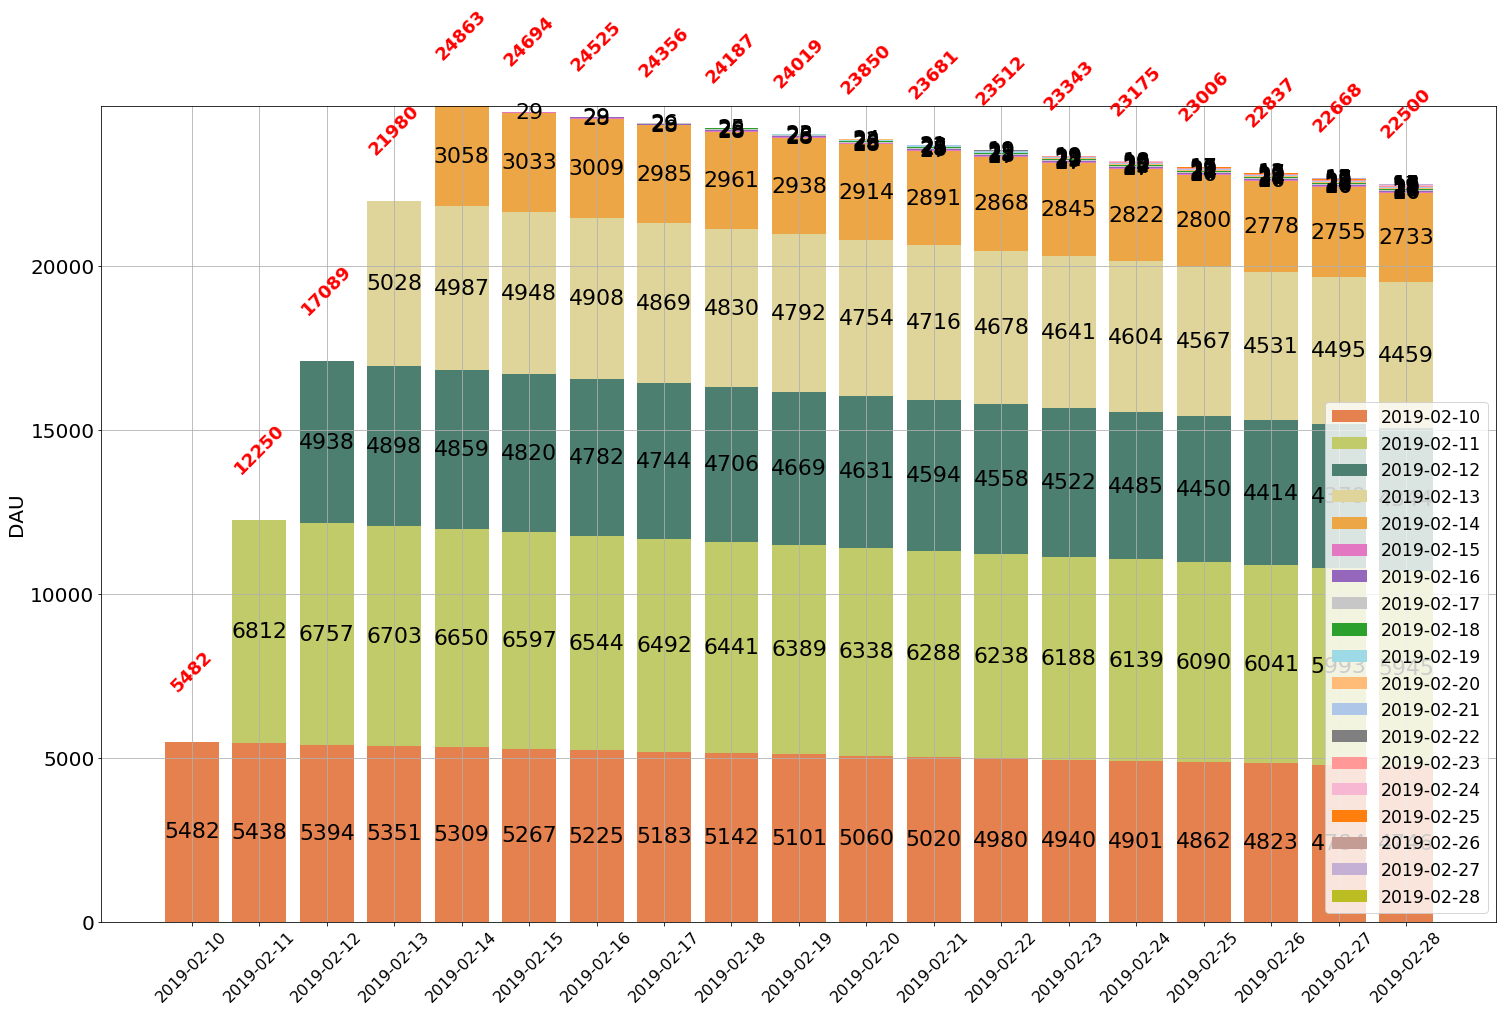

In [197]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as pltcolors
import pandas as pd
import numpy as np
import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors as mcolors
from matplotlib import cm
from beautifultable import BeautifulTable
from datetime import datetime
from datetime import timedelta
from scipy.stats import linregress

def stacked_bar( data, series_labels, category_labels=None, 
                show_values=False, value_format="{}", y_label=None, 
                grid=True, reverse=False, show_totals_values=False, totals = [],
                colors=[] ):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    plt.figure( figsize = (25, 15) )
    
    ny = len(data[0])
    ind = list( range(ny) )

    axes = []
    cum_size = np.zeros( ny )

    data = np.array( data )

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate( data ):
        if colors:
            axes.append( plt.bar( ind, row_data, bottom=cum_size, 
                                label=series_labels[i], color = colors[ i ] ) )
        else:
            axes.append( plt.bar( ind, row_data, bottom=cum_size, 
                                label=series_labels[i] ) )
        cum_size += row_data

    if category_labels:
        category_font_size = 20 if len( category_labels ) <= 15 else 16
        plt.xticks( ind, category_labels, fontsize=category_font_size )
        plt.xticks( rotation=45 )

    if y_label:
        plt.ylabel( y_label, fontsize=20 )
        plt.yticks( fontsize=20 )

    plt.legend( fontsize = 'xx-large' )

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                if h != 0:
                    plt.text( bar.get_x() + w/2, bar.get_y() + h/2, 
                             h, ha="center", 
                             va="center", fontsize=22 )
                    
    if show_totals_values:
        #show the total for each stacked bar chart
        #eg. the sum of the values for any given category
        if totals:
            if len( totals ) == len( category_labels ):
                for index, total in enumerate( totals ):
                    totals_font = 26 if len( category_labels ) <= 15 else 18
                    totals_rotate = 0 if len( category_labels ) <= 15 else 45
                    totals_height = 3 if len( category_labels ) <= 15 else 10
                    plt.text( index, total + ( totals_height/100 * sum( totals ) / len( totals ) ), 
                             total, ha="center", 
                             va="center", fontsize=totals_font, color="r", 
                             weight = 'bold', rotation=totals_rotate )

def build_cohort_DAU_map( cohort, map_length ):
    DAU = [ 0 ] * map_length
    for x in range( 0, map_length ):
        DAU[ x ] = int( cohort[ 'cohort_size' ] * np.exp( cohort[ 'retention_profile' ][ 1 ] * x ) )
    return DAU

def build_cohort( cohorts, date, cohort_size, retention_profile, color = None ):
    cohort = pd.DataFrame( columns=[ 'date', 'retention_profile', 'cohort_size', 'color' ] )
    if color is None:
        color = random.choice( colors )
    if not cohorts.empty:
        while color in cohorts[ 'color' ].tolist():
            color = random.choice( colors )
    cohort.loc[ 0 ] = [ date.date(), retention_profile, cohort_size, color ]
    return cohort

def create_cohorts( cohorts_DNU ):
    cohorts = pd.DataFrame()
    for i, value in enumerate( cohorts_DNU ): 
        cohort_size = cohorts_DNU[ i ][ 'DNU' ]
        cohort = build_cohort( cohorts, ( this_date + timedelta( days = i ) ) , cohort_size, retention_profiles[ 0 ], color = cohorts_DNU[ i ][ 'color' ] )
        cohorts = cohorts.append( cohort )
    return cohorts

def add_cohort( cohorts, date, cohort_size, retention_profile ):
    this_cohort = build_cohort( cohorts, date, cohort_size, retention_profile )
    cohorts = cohorts.append( this_cohort )
    return cohorts

def plot_DAU( DAU ):
    fig, ax1 = plt.subplots()
    plt.rcParams[ 'figure.figsize' ] = [ 10, 5 ]
    ax1.set_ylabel( 'DAU' )
    ax1.plot( np.arange( len( DAU ) ), DAU, label='DAU', color='#ff4d4d' )
    ax1.legend( loc='center right' )
    fig.suptitle( 'DAU', fontsize=14 )
    vals = ax1.get_yticks()
    gap_size = 90
    ax1.annotate('(Day: %s, DAU: %s)' % 
        ( 0, int( DAU[ 0 ] ) ), xy=( 0, int( DAU[ 0 ] ) ), textcoords='data')
    for x in range( 1, int( ( len( DAU ) - 1 ) / gap_size ) ):
        ax1.annotate('(Day: %s, DAU: %s)' % 
            ( x * gap_size, int( DAU[ x * gap_size ] ) ), xy=( x * gap_size, int( DAU[ x * gap_size ] ) ), textcoords='data')
    ax1.annotate('(Day: %s, DAU: %s)' % 
        ( len( DAU ) - 1, int( DAU[ len( DAU ) - 1 ] ) ), xy=( len( DAU ) - 1, int( DAU[ len( DAU ) - 1 ] ) ), textcoords='data')
    plt.grid()
    plt.show()
    
    print_DAU_table( DAU, DAU[ 0 ] )
    
def print_DAU_table( DAU, cohort_size ):
    table = BeautifulTable()
    table.column_headers = [ "Day", "DAU", "Needed Replacement" ]
    table.append_row( [ 0, int( DAU[ 0 ] ), cohort_size - int( DAU[ 0 ] ) ] )
    gap_size = 90
    for x in range( 1, int( ( len( DAU ) - 1 ) / gap_size ) ):
        table.append_row( [ x * gap_size, int( DAU[ x * gap_size ] ), cohort_size - int( DAU[ x * gap_size ] ) ] )
    table.append_row( [ len( DAU ) - 1, int( DAU[ len( DAU ) - 1 ] ), cohort_size - int( DAU[ len( DAU ) - 1 ] ) ] )
    
    print( table )
    
def plot_DNU( DNU ):
    fig, ax1 = plt.subplots()
    plt.rcParams[ 'figure.figsize' ] = [ 10, 5 ]
    ax1.set_ylabel( 'DNU' )
    ax1.bar( np.arange( len( DNU ) ), DNU, label='DNU', color='#ff4d4d' )
    ax1.legend( loc='center right' )
    fig.suptitle( 'DNU', fontsize=14 )
    vals = ax1.get_yticks()
    
    #add data labels to the bars
    rects = ax1.patches
    for rect, label in zip( rects, DNU ):
        height = rect.get_height()
        ax1.text( rect.get_x() + rect.get_width() / 2, height + 5, label,
                ha='center', va='bottom' )
    ##

    plt.grid()
    plt.show()
    
def print_retention_table( retention_profile ):
    table = BeautifulTable()
    table.column_headers = [ "Day", "Retention %" ]
    table.append_row( [ 0, int( retention_profile[ 0 ] ) ] )
    table.append_row( [ 1, int( retention_profile[ 1 ] ) ] )
    table.append_row( [ 30, int( retention_profile[ 30 ] ) ] )
    table.append_row( [ 60, int( retention_profile[ 60 ] ) ] )
    table.append_row( [ 360, int( retention_profile[ 360 ] ) ] )
    
    print( table )
    
def plot_retention_profile( retention_profile ):
    x = np.arange( 0, 364, 1 ) 
    this_profile = np.exp( retention_profile[ 1 ] * x ) * 100
    
    fig, ax1 = plt.subplots()
    plt.rcParams[ 'figure.figsize' ] = [ 10, 5 ]
    ax1.set_ylabel( 'Retention' )
    ax1.plot( this_profile, '-r', label='Retention %' )
    ax1.legend( loc='center right' )
    fig.suptitle( 'Retention Profile', fontsize=14 )
    vals = ax1.get_yticks()
    ax1.set_yticklabels( [ '%1.2f%%' %i for i in vals ] )
    plt.grid()
    plt.show()
    print_retention_table( this_profile )
    
def build_forward_DAU( cohorts, map_length ):
    map_length += len( cohorts )
    start_date = min( cohorts[ 'date' ] )
    today = start_date + timedelta( days = ( map_length ) ) 
    #map_length should include original cohort days, so add in the length of the cohorts
    dates = pd.date_range( start_date, periods = map_length ).tolist()
    dates = [ str( d.date() ) for d in dates ]
    forward_DAU = pd.DataFrame( columns = [ 'cohort_date' ] + dates )
    for index, value in cohorts.iterrows():
        this_date = value[ 'date' ]
        this_cohort = pd.DataFrame( columns = [ 'cohort_date' ] + dates )
        this_cohort.loc[ 0, 'cohort_date' ] = this_date
        i = 0
        while this_date < today:
            this_cohort.loc[ 0, str( this_date ) ]  = int( value[ 'cohort_size' ] * np.exp( value[ 'retention_profile' ][ 1 ] * i ) )
            this_date = this_date + timedelta( days = 1 )
            i += 1
        forward_DAU = forward_DAU.append( this_cohort )
        forward_DAU = forward_DAU.fillna( 0 )
    return ( forward_DAU, dates )

def plot_DNU_retention_map( cohorts ):
    
    forward_DAU, forward_DAU_dates = build_forward_DAU( cohorts, len( cohorts ) )
    cohort_days = [ forward_DAU[ x ].tolist() for x in forward_DAU.columns ]
    cohort_data = np.array( cohort_days[ 1: ] )

    column_names = forward_DAU_dates
    row_names = forward_DAU_dates

    fig = plt.figure( figsize = (25, 15) )
    ax = Axes3D( fig )

    lx = len( cohort_data[0] )     # Work out matrix dimensions
    ly = len( cohort_data[ :, 0 ] )
    xpos = np.arange( 0, lx, 1 )    # Set up a mesh of positions
    ypos = np.arange( 0, ly, 1 )
    xpos, ypos = np.meshgrid( xpos, ypos )

    xpos = xpos.flatten( )   # Convert positions to 1D array
    ypos = ypos.flatten( )
    zpos = np.zeros( lx * ly )

    dx = 0.5 * np.ones_like( zpos )
    dy = dx.copy()
    dz = cohort_data.flatten()
    
    plot_colors = cohorts[ 'color' ].tolist() * ly

    ax.bar3d( xpos, ypos, zpos, dx, dy, dz, color = plot_colors, shade=True, alpha=0.4 )
    
    max_value = max( [ [ max( DAU ) ] for DAU in cohort_data ] )[ 0 ]
    #get the max value from the entire DAU map and use that for plotting the text
    #otherwise the text gets obscured by the other graphs for cohorts with low starting DAU
    
    #print the DNU values, eg. the first value of each series   
    for ( x, y ), value in np.ndenumerate( cohort_data ):
        if x == y:
            ax.text( x, y, ( max_value / 2 ), value, color='#FFFFFF', fontsize=40 )

    ax.w_xaxis.set_ticklabels( column_names )
    ax.w_yaxis.set_ticklabels( row_names )
    ax.set_xlabel( 'Cohort Date', fontsize=40, labelpad=80 )
    ax.set_ylabel( 'Day', fontsize=40, labelpad=80 )
    ax.set_zlabel( 'DAU', fontsize=40, labelpad=60 )
    plt.tick_params( axis='both', which='major', labelsize=20 )

    plt.show()
    
def plot_forward_DAU_stacked( forward_DAU, forward_DAU_dates, show_values=False, show_totals_values=False, cohorts = None ):
    transformed = forward_DAU.values.tolist()

    for index, value in enumerate( transformed ):
       transformed[ index ] = value[ 1: ]
    
    totals = [ forward_DAU[ column ].sum() for column  
        in forward_DAU.loc[ :, forward_DAU.columns != 'cohort_date' ] ]
    
    if cohorts is not None:
        if not cohorts.empty:
            colors = cohorts[ 'color' ].tolist()
        else:
            print( "error: cohorts empty" )
    else:
        print( "error: cohorts weren't sent" )

    stacked_bar( transformed, forward_DAU_dates[ 0: len( transformed ) ], category_labels=forward_DAU_dates, 
        show_values=show_values, value_format="{}", y_label='DAU', 
        grid=True, reverse=False, show_totals_values=show_totals_values, totals = totals, colors = colors )
    
def build_DAU_trajecory( start_DAU, end_DAU, periods ):
    x = [ 1, periods ]
    y = [ start_DAU, end_DAU ]
    
    model = linregress( x, y )
    
    return model

def plot_projections_example( start_DAU, end_DAU, periods, DAU_values=[] ):
    if not DAU_values:
        y = periods * [ 0 ]
        y[ 0 ] = start_DAU
        y[ len( y ) - 1 ] = end_DAU
    else:
        y = DAU_values
        
    x = [ str( i ) for i in range( 1, len( y ) + 1 ) ]
    
    fig, ax1 = plt.subplots()
    plt.rcParams[ 'figure.figsize' ] = [ 10, 5 ]
    ax1.set_ylabel( 'DAU' )
    ax1.bar( x, y, label='DAU', color='#ff4d4d' )
    ax1.legend( loc='center right' )
    fig.suptitle( 'DAU', fontsize=14 )

    #add data labels to the bars
    rects = ax1.patches
    for rect, label in zip( rects, y ):
        height = rect.get_height()
        ax1.text( rect.get_x() + rect.get_width() / 2, height + 5, int( label ),
                ha='center', va='bottom' )
    ##
    
    ax1.set_xticklabels( x )

    plt.grid()
    plt.show()
    
def print_trailing_cohort_DNU_table( cohorts, periods ):
    
    replacement_DNU = cohorts[ ( -1 * periods ): ][ [ 'date', 'cohort_size' ] ]
    
    table = BeautifulTable()
    table.column_headers = replacement_DNU.columns.tolist()

    for index, row in replacement_DNU.iterrows():
        table.append_row( row )
    
    print( table )
    
def build_DAU_projection_map( cohorts, retention_profiles, forward_DAU, DAU_values ):
    
    this_DAU_value = DAU_values[ 0 ]
    this_date_value = datetime.strptime( forward_DAU.columns.tolist()[ -1 ] , '%Y-%m-%d' ) + timedelta( days = 1 )
    
    #advance the cohorts forward by one day to see what the natural DAU 
    #from existing cohorts would be without any additions
    forward_DAU, forward_DAU_dates = build_forward_DAU( cohorts, 1 )
    natural_DAU = forward_DAU.iloc[ :, -1 ].sum()
    
    #calculate replacement DAU needed to hit the DAU goal
    replacement_DAU = this_DAU_value - natural_DAU
    #add this new cohort on this day IF the replacement DAU is positive
    cohorts = add_cohort( cohorts, this_date_value, ( 0 if replacement_DAU < 0 else replacement_DAU ), 
        retention_profiles[ 0 ] )
        
    #advance the cohorts, including the new cohort, forward by one day
    forward_DAU, forward_DAU_dates = build_forward_DAU( cohorts, 0 )
    
    #if this was the last DAU target to hit, return the values
    if len( DAU_values ) == 1:
        return cohorts
    #if there are more DAU targets left to hit, remove this target and run the process again recursively
    return build_DAU_projection_map( cohorts, retention_profiles, forward_DAU, DAU_values[ 1: ] )

def run_simulation( forward_DAU, DAU_target, periods, cohorts ):
    ###start projections
    start_DAU = forward_DAU.iloc[ :, -1].sum() #the current value of DAU

    model = build_DAU_trajecory( start_DAU, DAU_target, periods )
    ###end projections

    ###plot a projection example
    plot_projections_example( start_DAU, DAU_target, periods )

    DAU_values = [ model[ 0 ] * i + model[ 1 ] for i in range( 1, periods + 1 ) ]
    #start from 2 because we want to exclude the first value, which is the last value of the existing cohorts

    plot_projections_example( start_DAU, DAU_target, periods, DAU_values )

    cohorts = build_DAU_projection_map( cohorts, retention_profiles, forward_DAU, DAU_values[ 1: ] )
    forward_DAU, forward_DAU_dates = build_forward_DAU( cohorts, 0 )

    plot_forward_DAU_stacked( forward_DAU, forward_DAU_dates, show_values=True, 
        show_totals_values=True, cohorts = cohorts )

    print_trailing_cohort_DNU_table( cohorts, periods - 1 )
    
###setup
cmap = cm.get_cmap( 'tab20', 100 )    # PiYG, create a color map
colors = [ pltcolors.rgb2hex( cmap( i )[ :3 ] ) for i in range( cmap.N ) ] 

retention_profiles = [ [ 0, -.008, 1 ] ] 
#the retention profile that each cohort will take
#the larger the absolute value of the 2nd element, the steeper the curve
cohorts_DNU = [ { "DNU": 5482, "color": "#E4814F" },
    { "DNU": 6812, "color": "#C1CB69" },
    { "DNU": 4938, "color": "#4D7F71" },
    { "DNU": 5028, "color": "#DFD59A" },
    { "DNU": 3058, "color": "#EDA646" } ]

base_cohorts = create_cohorts( cohorts_DNU )
this_date = datetime.now()

#the initial forward_DAU calculation, it creates the stacked cohorts
#but doesn't advance them further than the number of cohorts
# (eg. only the original cohorts are included but they are all projected forward
# to the end of this cohort series)
base_forward_DAU, base_forward_DAU_dates = build_forward_DAU( base_cohorts, 0 )
#an example DAU map for one cohort
cohort_DAU = build_cohort_DAU_map( base_cohorts.iloc[ 0 ], 365 )
###end setup

###explanatory visualizations
plot_retention_profile( retention_profiles[ 0 ] )
plot_DAU( cohort_DAU )
plot_DNU( list( base_cohorts[ 'cohort_size' ] ) )
plot_DNU_retention_map( base_cohorts )
plot_forward_DAU_stacked( base_forward_DAU, base_forward_DAU_dates, 
    show_values=True, show_totals_values=True, cohorts=base_cohorts )
###end explanatory visualizations

###show what the base cohorts would evolve to over 15 periods without any NEW cohorts
example_forward_DAU, example_forward_DAU_dates = build_forward_DAU( base_cohorts, 15 )
plot_forward_DAU_stacked( example_forward_DAU, example_forward_DAU_dates, show_values=True, 
    show_totals_values=True, cohorts = base_cohorts )

###simulations
#first simulation: growing to 50000 DAU after 15 periods
run_simulation( base_forward_DAU, 50000, 15, base_cohorts ) 
#second simulation: maintaining the same DAU over 15 periods
run_simulation( base_forward_DAU, base_forward_DAU.iloc[ :, -1].sum(), 15, base_cohorts ) 
#third simulation: DAU declines to just 15000 over 15 periods
run_simulation( base_forward_DAU, 22500, 15, base_cohorts ) 
###end simulations


